In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("topic_count").getOrCreate()

In [4]:
df = spark.read.csv("mock_data_unique.csv", header=True, inferSchema=True)
df.head(5)

[Row(id='<built-in function id>', question='What is Virtual Reality?', answer='Cellular senescence is a process involving Designing efficient transportation systems.', keywords='Guglielmo Marconi, Virtual Reality, San Antonio', updated_time=datetime.datetime(2023, 11, 30, 2, 51, 57), topic='Virtual reality'),
 Row(id='<built-in function id>', question='How does Oxygen transport work?', answer='The capital of Pakistan is Charlotte.', keywords='Pakistan, Cybersecurity, Galileo Galilei', updated_time=datetime.datetime(2024, 5, 6, 2, 51, 57), topic='Cultural diversity'),
 Row(id='<built-in function id>', question='How does Oxygen transport work?', answer="Leo Tolstoy wrote 'One Hundred Years of Solitude'.", keywords='Miami, Max Planck, Leo Tolstoy', updated_time=datetime.datetime(2024, 5, 11, 2, 51, 57), topic='Sustainable agriculture'),
 Row(id='<built-in function id>', question="Who wrote 'Invisible Man'?", answer='Smart Cities is a technology that involves Building artificial organs for

In [5]:
# Count the number of topics
df.groupBy("topic").count()

+--------------------+-----+
|               topic|count|
+--------------------+-----+
|    Entrepreneurship|20521|
|  Space colonization|20462|
|  Internet of Things|20236|
|Blockchain techno...|20455|
|       Cybersecurity|20514|
|   Virtual education|20235|
|  Ocean conservation|20243|
|     Gender equality|20173|
|Biometric identif...|20570|
|Artificial intell...|20033|
|      Urban planning|20282|
|        Green energy|20383|
| Biomedical research|20357|
|Economic development|20228|
|   Augmented reality|20679|
|  Cultural diversity|20611|
|    Renewable energy|20388|
|   Consumer behavior|20437|
|       Global health|20232|
| Conflict resolution|20509|
+--------------------+-----+
only showing top 20 rows



In [6]:
# plot the number of topics
import matplotlib.pyplot as plt
import pandas as pd
df_topic_count = df.groupBy("topic").count().toPandas()
df_topic_count = df_topic_count.sort_values("count", ascending=False)
df_topic_count

,topic,count
14,Augmented reality,20679
40,Robotics,20665
23,Ethical dilemmas in technology,20655
46,Neuroscience,20653
36,Bioinformatics,20651
15,Cultural diversity,20611
45,Educational reform,20602
8,Biometric identification,20570
33,Art and technology,20568
21,Space exploration,20563


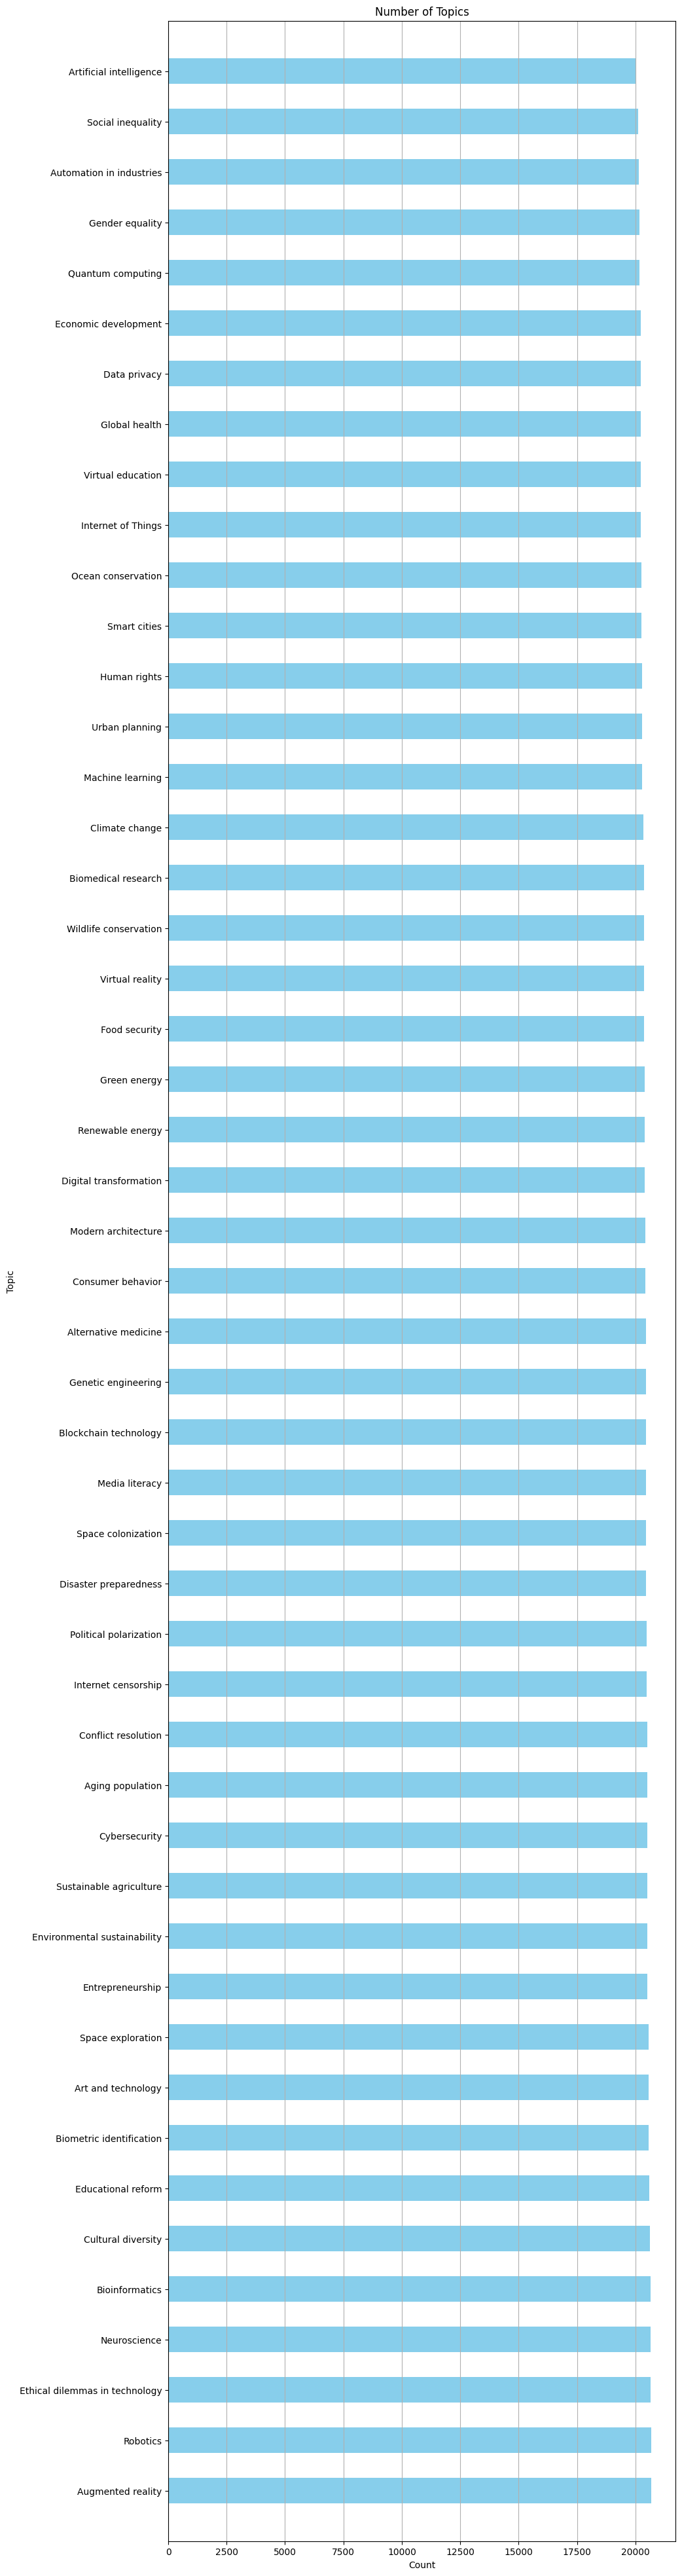

In [7]:
plt.figure(figsize=(10, 50))
plt.barh(df_topic_count["topic"], df_topic_count["count"], height=0.5, color="skyblue")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.title("Number of Topics")
plt.grid(axis="x")
plt.ylim(-1, len(df_topic_count))
plt.show()